In [1]:
#scaling - standard, min max scaling 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

model = SVC()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

scaler = StandardScaler()

scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_scaled, y_train)

print("test score:", model.score(X_test_scaled,y_test))

X_test_scaled[0].mean()






test score: 0.951048951048951


0.43026424925662504

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

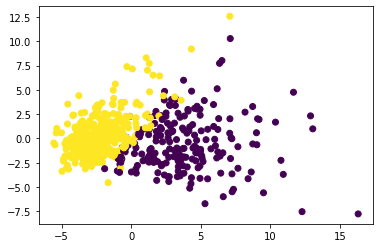

In [2]:
# Principal component analysis

from sklearn.datasets import load_breast_cancer

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =0)

scalar = StandardScaler()

X_scalar_train = scalar.fit_transform(cancer.data)

pca_comp = PCA(n_components=2)

pca_comp.fit(X_scalar_train)
x_pca = pca_comp.transform(X_scalar_train)



plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer.target)

x_pca

# plt.gca().set_aspect("equal")


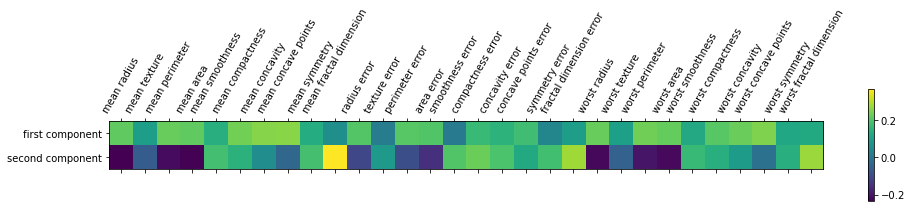

In [3]:
#components and importance of each feature of the components

plt.matshow(pca_comp.components_)
plt.yticks([0,1], ['first component', 'second component'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60)
plt.colorbar()

(87, 65)

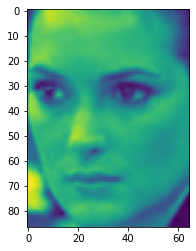

In [4]:
#feature extraction
from sklearn.datasets import fetch_lfw_people

from matplotlib import pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

people.images.shape

plt.imshow(people.images[0])


people.images[0].shape


In [5]:
import numpy as np
counts = np.bincount(people.target)
a = np.c_[people.target_names, counts]

for i, v in a:
    print("{0:25}  {1:3}".format(i,v))

Alejandro Toledo           39 
Alvaro Uribe               35 
Amelie Mauresmo            21 
Andre Agassi               36 
Angelina Jolie             20 
Ariel Sharon               77 
Arnold Schwarzenegger      42 
Atal Bihari Vajpayee       24 
Bill Clinton               29 
Carlos Menem               21 
Colin Powell               236
David Beckham              31 
Donald Rumsfeld            121
George Robertson           22 
George W Bush              530
Gerhard Schroeder          109
Gloria Macapagal Arroyo    44 
Gray Davis                 26 
Guillermo Coria            30 
Hamid Karzai               22 
Hans Blix                  39 
Hugo Chavez                71 
Igor Ivanov                20 
Jack Straw                 28 
Jacques Chirac             52 
Jean Chretien              55 
Jennifer Aniston           21 
Jennifer Capriati          42 
Jennifer Lopez             21 
Jeremy Greenstock          24 
Jiang Zemin                20 
John Ashcroft              53 
John Neg

<ipython-input-6-ba6cae72a870>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


score 0.23255813953488372
new score after pca0.31


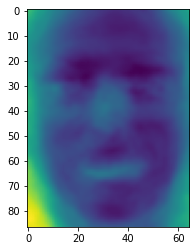

In [6]:
# PCA improves the model accuracy by selecting the important features

mask = np.zeros(people.target.shape, dtype=np.bool)


for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

    
mask 
    
X_people = people.data[mask]

y_people = people.target[mask]


X_people = X_people/255

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print("score", model.score(X_test, y_test))

# we can now apply PCA to improve the score 

from sklearn.decomposition import PCA

pca_model = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)


new_X_train_pca = pca_model.transform(X_train)

new_X_test_pca = pca_model.transform(X_test)

new_model = KNeighborsClassifier(n_neighbors=1)

new_model.fit(new_X_train_pca, y_train)

print("new score after pca{:.2f}".format(new_model.score(new_X_test_pca,y_test)))



plt.imshow(pca_model.components_[0].reshape(people.images[0].shape))






In [7]:
# this shows that the number of rows must be same when we send a numpy array as an index to another numpy array 

a = np.array([1,2,3,4])

c= np.zeros(4, dtype=np.bool)

c[0] = True

d = a[c]


d

<ipython-input-7-3b4df4d558d5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c= np.zeros(4, dtype=np.bool)


array([1])

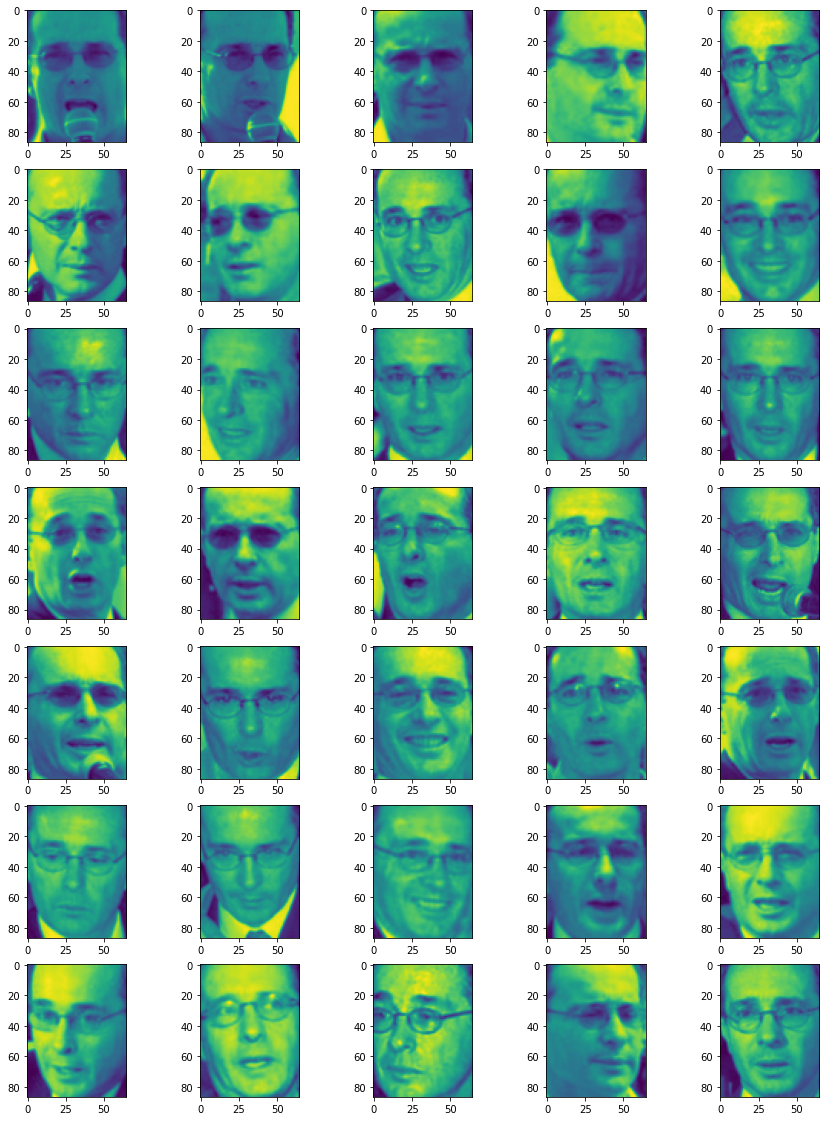

In [8]:
# all the images of a single person

fig,axes = plt.subplots(7,5, figsize=(15,20))

b = np.where(people.target ==1)
# print(b[0])
# print(zip(axes.ravel(),b))
for ax,c in zip(axes.ravel(),b[0]):
#     print("This",c)
    ax.imshow(people.images[c])

In [9]:
people.images[0].shape

(87, 65)

In [10]:
X_train.shape

(1547, 5655)

In [11]:
new_X_train_pca.shape

(1547, 100)

/Users/sukruthananth/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/sukruthananth/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


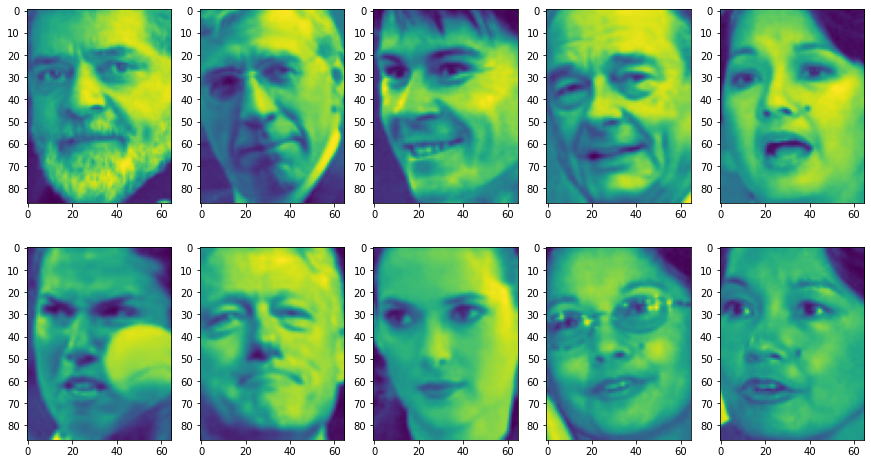

In [12]:
# the NMF non nenegative matrix factorization 
# plotting images for which a particular component is strong

from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0).fit(X_train)

nmf_X_train = nmf.transform(X_train)

nmf_X_test = nmf.transform(X_test)

indexes = np.argsort(nmf_X_train[:,7])[::-1] # this will sort and returns the value in reverse which makes the highest first

fig, axes = plt.subplots(2,5, figsize=(15,8))

for ax, ind in zip(axes.ravel(), indexes):
    ax.imshow(X_train[ind].reshape(people.images[0].shape))


Text(0, 0.5, 'second component')

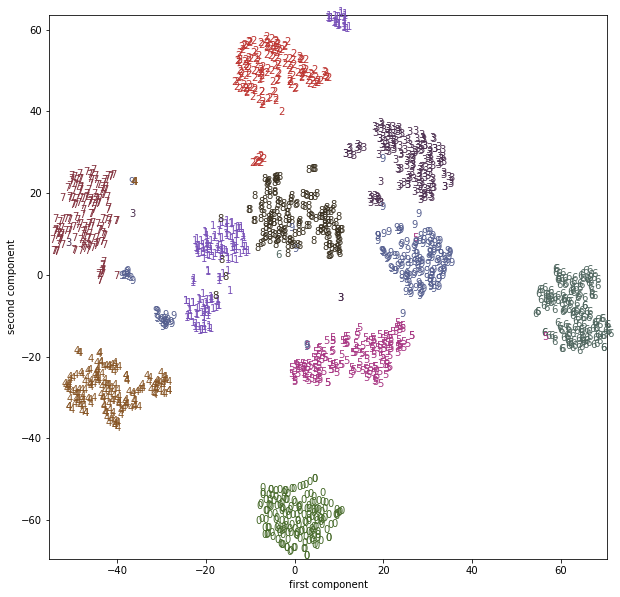

In [13]:
# T-Sne or Manifold learning 

# compare between PCA and T-sne to find out how they do on the projection in two dimensions
from sklearn.datasets import load_digits

from sklearn.manifold import TSNE


digits = load_digits()

pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = TSNE().fit_transform(digits.data)#used same name to save recoding 

# digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))

plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())

plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits_pca)):
    plt.text(digits_pca[i,0],digits_pca[i,1], str(digits.target[i]), color=colors[digits.target[i]])

plt.xlabel("first component")

plt.ylabel("second component")


In [14]:
len(digits.data)

1797

In [15]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
labels=[-1,0]

X_people[labels==-1]

array([], shape=(0, 2063, 5655), dtype=float32)

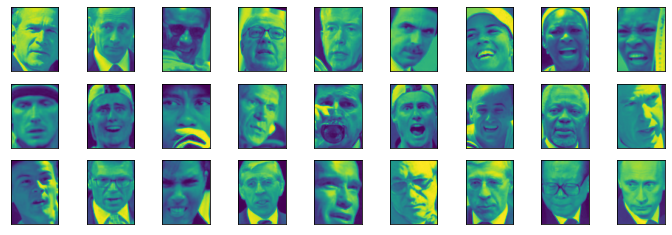

In [23]:
# finding the noise of a DBSCAN

# this is outlier detection

from sklearn.cluster import DBSCAN

pca = PCA(n_components=100, whiten=True, random_state=0) 

pca.fit_transform(X_people)

X_pca = pca.transform(X_people)

dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)

noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()): ax.imshow(image.reshape(people.images[0].shape), vmin=0, vmax=1)